# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at
'Address': Address for the house

### Data Aquisition and Clean-up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df  = pd.read_csv(r'C:/Users/mindf/Desktop/sapient-us/linear-regression/USA_Housing.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df[['Address']]

### Exploratory Data Analysis

In [ ]:
sns.pairplot

In [ ]:
sns.distplot(df['Price'])

In [ ]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].corr())

In [ ]:
df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].corr()

### Training the Linear Regression Model

In [ ]:
columns = df.columns
columns

##### Setting the target and predictors

In [ ]:
#Setting the target column
target = 'Price'
y = df['Price']
y.head()

In [ ]:
#Get the predictor columns
droplist = [target, 'Address']
predictors = df.drop(droplist, axis=1).columns
X = df[predictors]
X.head()

##### Splitting the data into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [47]:
y_test.head()

789     8.008091e+05
2507    1.620949e+06
2376    1.219637e+06
1378    1.172133e+06
598     8.644838e+05
Name: Price, dtype: float64

##### Build and training the Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
lm.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [29]:
lm.intercept_

-2632015.912069224

In [31]:
lm.coef_

array([2.14377564e+01, 1.66072469e+05, 1.20593183e+05, 1.13679220e+03,
       1.53277084e+01])

In [33]:
coeff_df = pd.DataFrame(lm.coef_, predictors, columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Area Income,21.437756
Avg. Area House Age,166072.468652
Avg. Area Number of Rooms,120593.183329
Avg. Area Number of Bedrooms,1136.792202
Area Population,15.327708


##### Testing the model by using the test data for predictions

In [51]:
predictions = lm.predict(X_test)

In [35]:
predictions

array([ 813753.12350194, 1561341.17019239, 1322582.87651324,
       1190215.56638977,  968260.4334247 , 1249860.41988948,
       1191758.54894988,  733746.63632297, 1216582.24277205,
       1538401.22872381, 1139814.96707131,  972026.9233315 ,
        971695.81165345, 1811045.251058  , 1338458.13229977,
        685127.16328774, 2181177.12510847,  929403.99600045,
       1189986.0516791 ,  807237.28082532,  736250.10725147,
       1438114.15779233, 2048294.99707053, 1534398.33481661,
        703953.08068698, 1444424.72001517, 1922986.49980337,
        801154.79601674, 1676687.47717331, 1022257.07033114,
       1121728.53916647, 1218410.23685166, 1197062.82394896,
       1324414.49805286, 1902202.67112177, 1702270.95379237,
       1675888.41209811, 1536171.37540717, 1067886.5929805 ,
        664346.24043587, 1638403.48598168, 1772556.5889381 ,
       1510281.77111642,  874164.99157131, 1182172.3973544 ,
        928413.78224673, 1415593.77229822, 1474509.8387366 ,
       1769678.3836064 ,

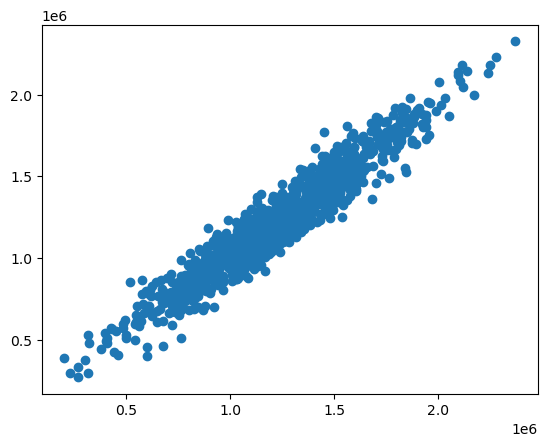

In [36]:
plt.scatter(y_test, predictions)

##### Evaluation metrics

In [37]:
from sklearn import metrics

In [38]:
metrics.mean_absolute_error(y_test, predictions)

81758.9821947549

In [40]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

101815.12569475686

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions)) # retrained model with 10% test data

#### How to make a prediction of a foreign values?

In [53]:
#['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population'

In [ ]:
lm.predict([[100000, 15, 5, 3, 1000000]])